# Exercise 1


In [1]:
def insertion_sort(arr):
    steps = 0
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:  # Compare key with the previous element
            arr[j + 1] = arr[j]  # Shift element one position to the right
            j -= 1
            steps += 2  # Increment steps for comparison and assignment
        arr[j + 1] = key  # Place key in the correct position
        steps += 1  # Increment step for the final assignment
    return arr, steps


In [2]:
def merge_sort(arr):
    def merge(left, right):
        merged = []
        steps = 0
        i = j = 0

        while i < len(left) and j < len(right):
            steps += 1  # Count the comparison
            if left[i] < right[j]:
                merged.append(left[i])
                i += 1
            else:
                merged.append(right[j])
                j += 1

        # Append remaining elements from both subarrays
        merged.extend(left[i:])
        merged.extend(right[j:])
        steps += len(left) - i + len(right) - j  # Count remaining assignments

        return merged, steps

    if len(arr) <= 1:
        return arr, 0

    mid = len(arr) // 2
    left, steps1 = merge_sort(arr[:mid])
    right, steps2 = merge_sort(arr[mid:])
    merged, steps3 = merge(left, right)
    steps = steps1 + steps2 + steps3

    return merged, steps


In [3]:
import random
import matplotlib.pyplot as plt

# Heap Sort implementation with step counting
class HeapSortWithSteps:
    def __init__(self):
        self.comparisons = 0  # Count of comparisons

    def heapify(self, arr, n, i):
        largest = i  # Initialize largest as root
        left = 2 * i + 1  # left child
        right = 2 * i + 2  # right child

        # Compare left child with root
        if left < n:
            self.comparisons += 1  # One comparison
            if arr[left] > arr[largest]:
                largest = left

        # Compare right child with root
        if right < n:
            self.comparisons += 1  # One comparison
            if arr[right] > arr[largest]:
                largest = right

        # If largest is not root, swap and continue heapifying
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]  # Swap
            self.heapify(arr, n, largest)  # Recursively heapify the affected subtree

    def heap_sort(self, arr):
        n = len(arr)

        # Build a max-heap
        for i in range(n // 2 - 1, -1, -1):
            self.heapify(arr, n, i)

        # Extract elements from the heap one by one
        for i in range(n - 1, 0, -1):
            arr[i], arr[0] = arr[0], arr[i]  # Swap the root with the last element
            self.heapify(arr, i, 0)  # Heapify the reduced heap

        return arr

    def get_step_counts(self):
        return self.comparisons
    
class QuickSortWithSteps:
    def __init__(self):
        self.comparisons = 0  # Count of comparisons

    def partition(self, arr, low, high):
        pivot = arr[high]  # Taking the last element as the pivot
        i = low - 1  # Index of smaller element

        for j in range(low, high):
            self.comparisons += 1  # One comparison
            if arr[j] < pivot:  # If current element is smaller than the pivot
                i += 1
                arr[i], arr[j] = arr[j], arr[i]  # Swap

        arr[i + 1], arr[high] = arr[high], arr[i + 1]  # Swap pivot into the correct place
        return i + 1

    def quick_sort(self, arr, low, high):
        if low < high:
            pi = self.partition(arr, low, high)  # Partitioning index

            # Recursively sort elements before and after partition
            self.quick_sort(arr, low, pi - 1)
            self.quick_sort(arr, pi + 1, high)

    def get_step_counts(self):
        return self.comparisons

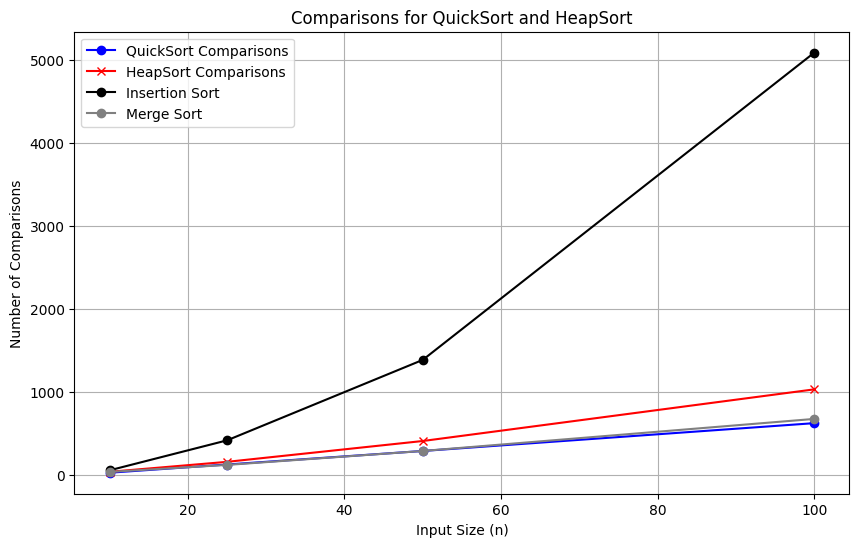

In [9]:
sizes = [10, 25, 50, 100]

insertion_steps = []
merge_steps = []

for size in sizes:
    random_list = [random.randint(0, 1000) for _ in range(size)]
    
    # Calculate steps for insertion sort
    _, steps_insertion = insertion_sort(random_list[:])  # Use a copy of the list
    insertion_steps.append(steps_insertion)
    
    # Calculate steps for merge sort
    _, steps_merge = merge_sort(random_list[:])  # Use a copy of the list
    merge_steps.append(steps_merge)

# Initialize lists to store comparisons for both algorithms
comparisons_qs = []
comparisons_hs = []

# Collect data for QuickSort
for size in sizes:
    arr = [random.randint(1, 10000) for _ in range(size)]
    quick_sorter = QuickSortWithSteps()
    quick_sorter.quick_sort(arr, 0, len(arr) - 1)
    comparisons_qs.append(quick_sorter.get_step_counts())

# Collect data for HeapSort
for size in sizes:
    arr = [random.randint(1, 10000) for _ in range(size)]
    heap_sorter = HeapSortWithSteps()
    heap_sorter.heap_sort(arr)
    comparisons_hs.append(heap_sorter.get_step_counts())

# Plot comparisons for QuickSort and HeapSort
plt.figure(figsize=(10, 6))
plt.plot(sizes, comparisons_qs, label="QuickSort Comparisons", color='blue', marker='o')
plt.plot(sizes, comparisons_hs, label="HeapSort Comparisons", color='red', marker='x')
plt.plot(sizes, insertion_steps, label="Insertion Sort", color = "black",marker="o")
plt.plot(sizes, merge_steps, label="Merge Sort",color = "grey", marker="o")
plt.xlabel('Input Size (n)')
plt.ylabel('Number of Comparisons')
plt.title('Comparisons for QuickSort and HeapSort')
plt.legend()
plt.grid(True)
plt.show()
